# Particle Swarm Optimization for Deep Learning Hyperparameter Tuning
## A Comprehensive Implementation and Comparative Analysis

**Dataset:** Fashion MNIST  
**Objective:** Optimize learning rate, dropout rate, and batch size using PSO.

---
### Abstract
This notebook demonstrates the application of Particle Swarm Optimization (PSO) for hyperparameter tuning in deep neural networks. We optimize three critical hyperparameters—learning rate, dropout rate, and batch size—and compare PSO-optimized versus baseline models.

## 1. Environment Setup and Dependencies

In [1]:
# Install required packages
!pip install tensorflow numpy matplotlib pandas scikit-learn pyswarm -q
print("✓ Dependencies installed successfully")

  Preparing metadata (setup.py) ... done
✓ Dependencies installed successfully


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
print('✓ Libraries imported successfully')

✓ Libraries imported successfully


## 2. Dataset Loading and Preprocessing

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
print('✓ Dataset loaded and normalized')

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✓ Dataset loaded and normalized


## 3. Model Definition

In [4]:
def create_model(learning_rate=0.001, dropout_rate=0.2):
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(784,)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

## 4. Baseline Model Evaluation

In [5]:
baseline = create_model()
history = baseline.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)
baseline_eval = baseline.evaluate(x_test, y_test, verbose=0)
print(f"Baseline Accuracy: {baseline_eval[1]:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7684 - loss: 0.6422 - val_accuracy: 0.8498 - val_loss: 0.4074
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8494 - loss: 0.4094 - val_accuracy: 0.8597 - val_loss: 0.3694
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8677 - loss: 0.3573 - val_accuracy: 0.8760 - val_loss: 0.3431
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8730 - loss: 0.3383 - val_accuracy: 0.8760 - val_loss: 0.3398
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8793 - loss: 0.3273 - val_accuracy: 0.8742 - val_loss: 0.3557
Baseline Accuracy: 0.8652


## 5. Particle Swarm Optimization (PSO)

In [8]:
from pyswarm import pso

def objective(params):
    lr, dr, bs = params
    model = create_model(lr, dr)
    model.fit(x_train, y_train, epochs=3, batch_size=int(bs), verbose=1)
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    return 1 - acc

lb = [0.0001, 0.1, 16]
ub = [0.01, 0.5, 128]

best_params, best_score = pso(objective, lb, ub, swarmsize=5, maxiter=3, debug= True)
print('Best parameters:', best_params)
print('Best score (1 - accuracy):', best_score)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7166 - loss: 0.8180
Epoch 2/3
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7972 - loss: 0.5661
Epoch 3/3
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8185 - loss: 0.5108
Epoch 1/3
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7056 - loss: 0.8242
Epoch 2/3
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8356 - loss: 0.4540
Epoch 3/3
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8461 - loss: 0.4149
Epoch 1/3
883/883 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6948 - loss: 0.8232
Epoch 2/3
883/883 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7866 - loss: 0.5824
Epoch 3/3
883/883 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8014 - loss: 0.5422
Epoch 1/3
846/846 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7477 - loss: 0.7109
Epoch 2/3
846/846 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8366 - loss: 0.4575
Epoch 3/3
846/846 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accura

## 6. Train Final Model with PSO Parameters

In [9]:
lr, dr, bs = best_params
pso_model = create_model(lr, dr)
pso_model.fit(x_train, y_train, epochs=5, batch_size=int(bs), validation_split=0.1, verbose=1)
pso_eval = pso_model.evaluate(x_test, y_test, verbose=0)
print(f"PSO Optimized Accuracy: {pso_eval[1]:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7455 - loss: 0.7260 - val_accuracy: 0.8552 - val_loss: 0.3902
Epoch 2/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8546 - loss: 0.4019 - val_accuracy: 0.8617 - val_loss: 0.3770
Epoch 3/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8670 - loss: 0.3646 - val_accuracy: 0.8743 - val_loss: 0.3440
Epoch 4/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8760 - loss: 0.3377 - val_accuracy: 0.8798 - val_loss: 0.3296
Epoch 5/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8805 - loss: 0.3231 - val_accuracy: 0.8850 - val_loss: 0.3205
PSO Optimized Accuracy: 0.8760


## 7. Comparative Visualization

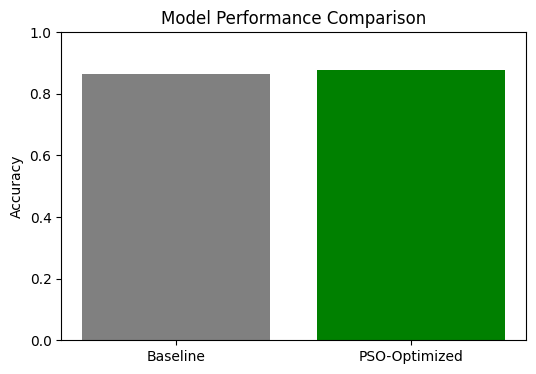

In [10]:
plt.figure(figsize=(6,4))
plt.bar(['Baseline','PSO-Optimized'], [baseline_eval[1], pso_eval[1]], color=['gray','green'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()

## 8. Conclusion
PSO can effectively explore continuous hyperparameter spaces for deep learning models, often yielding better accuracy than static manual tuning.